In [1]:
# Importa las librerias
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

In [2]:
# Importa el dataset Covid19
data = pd.read_csv('Cleaned-Data.csv')
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [3]:
# Filtrar el DataFrame con la columna de "Age_25-59"
data_filtro = data[data['Age_25-59'] == 1]

In [4]:
# Realizar la codificación OneHotEncoder para la columna 'Country'
encoder = OneHotEncoder(sparse_output=False)
encoder_countries = encoder.fit_transform(data_filtro[['Country']])

In [5]:
# Crear un nuevo DataFrame con las columnas codificadas
encoder_countries_df = pd.DataFrame(encoder_countries, columns=encoder.get_feature_names_out(['Country']))

In [6]:
# Restablecer el índice del DataFrame despues de aplicar las transformaciones
data_filtro = data_filtro.reset_index(drop=True)

In [7]:
# Concatenar los dos DataFrames
df_encoder = pd.concat([data_filtro, encoder_countries_df], axis=1)

In [8]:
# Estandarizacion del DataFrame convirtiendo los nombres de las columnas a minúsculas y reemplazando los espacios con guiones bajos
df_encoder.columns = [column.replace(' ', '_') for column in df_encoder.columns]

In [9]:
# Eliminar la columna original 'Country' del DataFrame
df_encoder = df_encoder.drop('Country', axis=1)
df_encoder

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Country_China,Country_France,Country_Germany,Country_Iran,Country_Italy,Country_Other,Country_Other-EUR,Country_Republic_of_Korean,Country_Spain,Country_UAE
0,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63355,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63356,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63357,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
63358,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Separar las características (variables independientes) de la etiqueta (variable objetivo)
x = df_encoder.drop('Severity_Severe', axis=1)
y = df_encoder['Severity_Severe']

In [17]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [18]:
# Normalizar las caracteristicas del conjunto de datos
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
# Inicializar el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [20]:
# Entrenar el clasificador KNN
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(x_test_scaled)

In [24]:
# Evaluación del rendimiento
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9516
           1       1.00      0.93      0.96      3156

    accuracy                           0.98     12672
   macro avg       0.99      0.96      0.97     12672
weighted avg       0.98      0.98      0.98     12672

[[9515    1]
 [ 231 2925]]


In [25]:
# Metrica de Evaluacion
print("Precisión: ", accuracy_score(y_test, y_pred))

Precisión:  0.9816919191919192


In [26]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

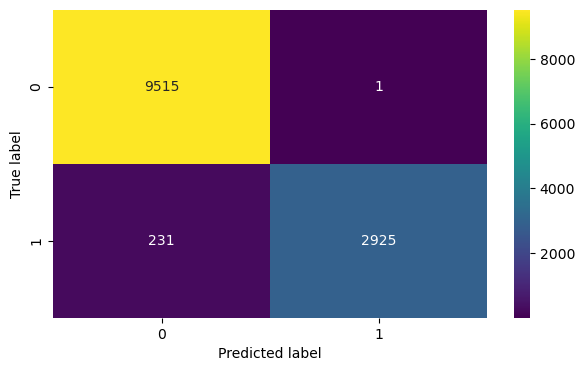

In [27]:
# Crea la figura, se establecen las caracteristicas y se añaden los títulos y las etiquetas
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
# Asegurar que los datos sean matrices NumPy
x_train = x_train.values.astype('float64')
x_test = x_test.values.astype('float64')

In [29]:
# Buscar mejor valor para asignar a K
knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)
print("Mejor k:", grid.best_params_)

Mejor k: {'n_neighbors': 9}


In [30]:
# Inicializar el clasificador KNN con el mejor k
knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])

In [31]:
# Entrenar el clasificador KNN
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=9)

In [32]:
# Hacer predicciones en el conjunto de prueba
y_pred = knn.predict(x_test_scaled)

In [33]:
# Evaluación del rendimiento
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9516
           1       1.00      0.99      0.99      3156

    accuracy                           1.00     12672
   macro avg       1.00      1.00      1.00     12672
weighted avg       1.00      1.00      1.00     12672

[[9510    6]
 [  26 3130]]


In [34]:
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

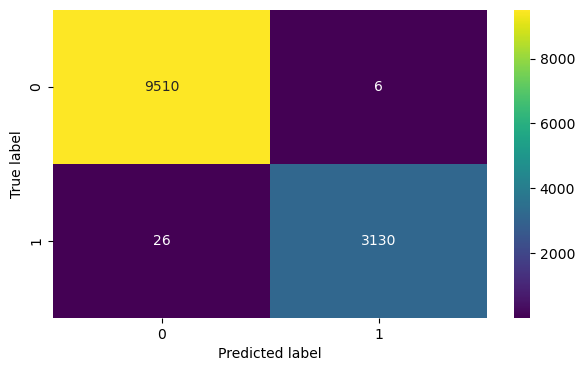

In [35]:
# Crea la figura, se establecen las caracteristicas y se añaden los títulos y las etiquetas
plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [36]:
# Metrica de Evaluacion
print("Precisión: ", accuracy_score(y_test, y_pred))

Precisión:  0.9974747474747475
